In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap

/home/rico/miniconda3/envs/biomlhack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
sm2receptor = pd.read_csv('data/pairs.csv', sep=';')
sm2receptor = sm2receptor[sm2receptor['Species'].isin(['homo sapiens', 'mus musculus'])]

In [33]:
sm2receptor['Mixture'].value_counts()

Mixture
mono              39028
sum of isomers    10868
mixture            1244
Name: count, dtype: int64

In [34]:
sm2receptor['Species'].value_counts()

Species
homo sapiens    40898
mus musculus    10242
Name: count, dtype: int64

In [35]:
sm2receptor['Mutation'].value_counts().head(20)

Mutation
D296N          143
+1M            124
Q293R          122
M81V            97
C149W           67
F75S            64
V118M_Q234R     64
L40Q            64
Q24R_I163M      63
C193G           63
C27R            63
R52S            63
P242S           63
Y120C           63
N136D           63
M51T            63
I37V            63
Y125S           63
R54Q            63
S294N           63
Name: count, dtype: int64

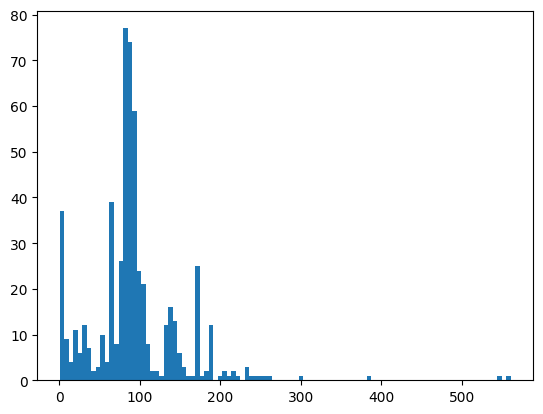

In [36]:
plt.hist(sm2receptor['Gene Name'].value_counts(), bins=100);

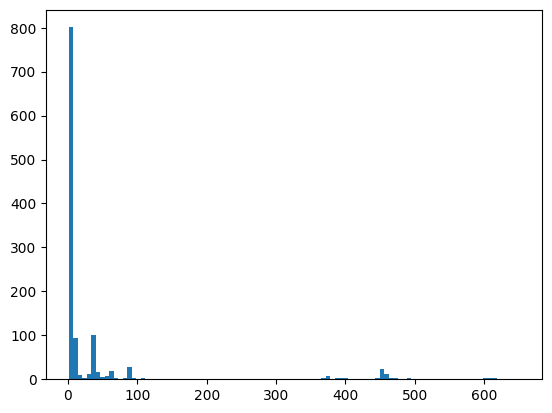

In [39]:
plt.hist(sm2receptor['Molecule Name'].value_counts(), bins=100);

In [94]:
sm2receptor['Responsive'].value_counts()

Responsive
0    48237
1     2903
Name: count, dtype: int64

In [41]:
sm2lang = pd.read_csv('data/Multi-Labelled_Smiles_Odors_dataset.csv')

In [42]:
sm2lang = sm2lang.rename({'nonStereoSMILES': 'SMILES'}, axis=1)

In [43]:
sm2lang['descriptors'].value_counts().head(20)

descriptors
odorless                                     199
fruity                                        42
waxy                                          24
fatty                                         24
sulfurous                                     20
woody                                         18
sweet                                         16
green                                         13
caramellic                                    13
spicy                                         12
fatty;oily                                    11
herbal                                        10
musk                                           9
fatty;waxy                                     9
floral                                         9
phenolic                                       8
gassy                                          8
vegetable;cognac;alcoholic;green;ethereal      8
fishy                                          8
balsamic                                       8
Name: co

In [44]:
sm2receptor.shape, sm2lang.shape

((51140, 14), (4983, 140))

In [45]:
sm2receptor.merge(sm2lang, on='SMILES', how='inner')['Responsive'].value_counts()

Responsive
0    10213
1      478
Name: count, dtype: int64

In [96]:
merged = sm2receptor.merge(sm2lang, on='SMILES', how='outer')
merged = merged[merged['Responsive']==1]
merged['descriptors'] = merged['descriptors'].fillna('unknown')

In [99]:
merged

,Species,Gene Name,UniProt ID,Mutation,Sequence,Molecule Name,CID,CAS,InChIKey,SMILES,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
9,homo sapiens,OR51E2,Q9H255,NaN,MSSCNFTHATFVLIGIPGLEKAHFWVGFPLLSMYVVAMFGNCIVVF...,Urea,1176.0,57-13-6,XSQUKJJJFZCRTK-UHFFFAOYSA-N,C(=O)(N)N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,homo sapiens,OR51E2,Q9H255,NaN,MSSCNFTHATFVLIGIPGLEKAHFWVGFPLLSMYVVAMFGNCIVVF...,Hydroxypyruvic acid,964.0,1113-60-6,HHDDCCUIIUWNGJ-UHFFFAOYSA-N,C(C(=O)C(=O)O)O,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,homo sapiens,OR51E2,Q9H255,NaN,MSSCNFTHATFVLIGIPGLEKAHFWVGFPLLSMYVVAMFGNCIVVF...,Glycine,750.0,56-40-6,DHMQDGOQFOQNFH-UHFFFAOYSA-N,C(C(=O)O)N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,homo sapiens,OR2C1,O95371,C149W,MDGVNDSSLQGFVLMGISDHPQLEMIFFIAILFSYLLTLLGNSTII...,thioglycolic acid,1133.0,68-11-1,CWERGRDVMFNCDR-UHFFFAOYSA-N,C(C(=O)O)S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,homo sapiens,OR51E2,Q9H255,NaN,MSSCNFTHATFVLIGIPGLEKAHFWVGFPLLSMYVVAMFGNCIVVF...,2-Ketoglutaric acid,51.0,328-50-7,KPGXRSRHYNQIFN-UHFFFAOYSA-N,C(CC(=O)O)C(=O)C(=O)O,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55311,homo sapiens,OR7D4_OR7D4P,Q8NG98,C139Y,MEAENLTELSKFLLLGLSDDPELQPVLFGLFLSMYLVTVLGNLLII...,Androstenone,6852393.0,NaN,HFVMLYAGWXSTQI-QYXZOKGRSA-N,C[C@]12CC[C@H]3[C@H]([C@@H]1CC=C2)CC[C@@H]4[C@...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55314,homo sapiens,OR7D4_OR7D4P,Q8NG98,L292M,MEAENLTELSKFLLLGLSDDPELQPVLFGLFLSMYLVTVLGNLLII...,Androstenone,6852393.0,NaN,HFVMLYAGWXSTQI-QYXZOKGRSA-N,C[C@]12CC[C@H]3[C@H]([C@@H]1CC=C2)CC[C@@H]4[C@...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55316,homo sapiens,OR51E2,Q9H255,NaN,MSSCNFTHATFVLIGIPGLEKAHFWVGFPLLSMYVVAMFGNCIVVF...,19-OH AD,252379.0,510-64-5,XGUHPTGEXRHMQQ-BGJMDTOESA-N,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)CCC4=CC(=O)...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55319,homo sapiens,OR51E2,Q9H255,NaN,MSSCNFTHATFVLIGIPGLEKAHFWVGFPLLSMYVVAMFGNCIVVF...,Epitestosterone,10204.0,481-30-1,MUMGGOZAMZWBJJ-KZYORJDKSA-N,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@H]2O)CCC4=CC(...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
merged[merged['descriptors']!='unknown']

,Species,Gene Name,UniProt ID,Mutation,Sequence,Molecule Name,CID,CAS,InChIKey,SMILES,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
6286,homo sapiens,OR1D2,P34982,NaN,MDGGNQSEGSEFLLLGMSESPEQQRILFWMFLSMYLVTVVGNVLII...,9-decen-1-ol,25612.0,NaN,QGFSQVPRCWJZQK-UHFFFAOYSA-N,C=CCCCCCCCCO,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7010,homo sapiens,OR1D2,P34982,NaN,MDGGNQSEGSEFLLLGMSESPEQQRILFWMFLSMYLVTVVGNVLII...,allyl cyclohexylpropionate,17617.0,NaN,TWXUTZNBHUWMKJ-UHFFFAOYSA-N,C=CCOC(=O)CCC1CCCCC1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7081,homo sapiens,OR2W1,Q9Y3N9,NaN,MDQSNYSSLHGFILLGFSNHPKMEMILSGVVAIFYLITLVGNTAII...,diallyl sulfide,11617.0,592-88-1,UBJVUCKUDDKUJF-UHFFFAOYSA-N,C=CCSCC=C,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7123,homo sapiens,OR51M1,Q9H341,H102Q_L135F_I204T_P256H_F318L,MSVQYSLSPQFMLLSNITQFSPIFYLTSFPGLEGIKHWIFIPFFFM...,diallyl sulfide,11617.0,592-88-1,UBJVUCKUDDKUJF-UHFFFAOYSA-N,C=CCSCC=C,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7126,homo sapiens,OR52E5,Q8NH55,P234L,MLHTNNTQFHPSTFLVVGVPGLEDVHVWIGFPFFAVYLTALLGNII...,diallyl sulfide,11617.0,592-88-1,UBJVUCKUDDKUJF-UHFFFAOYSA-N,C=CCSCC=C,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51927,homo sapiens,OR11G2,Q8NGC1,M1-_H2-_F3-_L4-_S5-_Q6-_N7-_D8-_L9-_N10-_I11-_...,MKIFNSPSNSSTFTGFILLGFPCPREGQILLFVLFTVVYLLTLMGN...,methanethiol,878.0,74-93-1,LSDPWZHWYPCBBB-UHFFFAOYSA-N,CS,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51941,homo sapiens,OR7C1_OR7C4,O76099,S99G_V126I_E171K_S210P_V247L_I315N,METGNQTHAQEFLLLGFSATSEIQFILFGLFLSMYLVTFTGNLLII...,methanethiol,878.0,74-93-1,LSDPWZHWYPCBBB-UHFFFAOYSA-N,CS,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51942,homo sapiens,OR51L1,Q8NGJ5,NaN,MGDWNNSDAVEPIFILRGFPGLEYVHSWLSILFCLAYLVAFMGNVT...,methanethiol,878.0,74-93-1,LSDPWZHWYPCBBB-UHFFFAOYSA-N,CS,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52141,homo sapiens,OR2W1,Q9Y3N9,NaN,MDQSNYSSLHGFILLGFSNHPKMEMILSGVVAIFYLITLVGNTAII...,Dimethyl trisulfide,19310.0,NaN,YWHLKYXPLRWGSE-UHFFFAOYSA-N,CSSSC,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
import torch
from protein_encoder import ProteinEncoder
from text_encoder import TextEncoder
from molecule_encoder import SmallMoleculeEncoder

In [47]:
device = torch.device('cuda:2')

In [48]:
prot_enc = ProteinEncoder(config_path='facebook/esm2_t30_150M_UR50D', out_dim=256)
prot_enc.model = prot_enc.model.to(device)
prot_enc.out = prot_enc.out.to(device)

# freeze weights
for param in prot_enc.model.parameters():
    param.requires_grad = False

/home/rico/miniconda3/envs/biomlhack/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [49]:
sm2receptor['UniProt ID'].nunique(), sm2receptor['Sequence'].nunique(), sm2receptor[['UniProt ID', 'Sequence']].nunique()

(574,
 1231,
 UniProt ID     574
 Sequence      1231
 dtype: int64)

In [50]:
uniprot2seq = sm2receptor[['UniProt ID', 'Sequence']].set_index('UniProt ID')['Sequence'].to_dict()
uniprot2species = sm2receptor[['UniProt ID', 'Species']].set_index('UniProt ID')['Species'].to_dict()

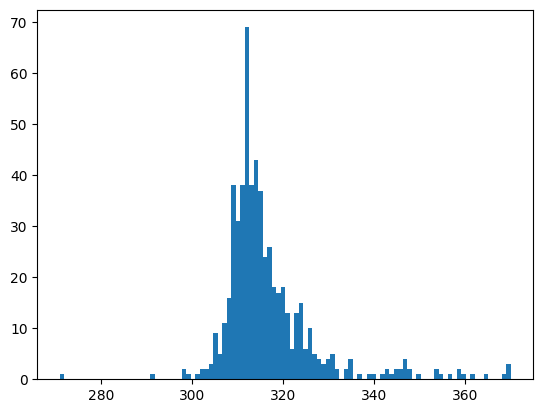

In [51]:
plt.hist([len(s) for s in uniprot2seq.values()], bins=100);

In [52]:
emb = prot_enc.get_repr(list(uniprot2seq.values()), batch_size=16, verbose=True).numpy(force=True)

Computing protein embeddings:   0%|          | 0/36 [00:00<?, ?it/s]

Computing protein embeddings: 100%|██████████| 36/36 [00:06<00:00,  5.27it/s]


In [53]:
u = umap.UMAP(n_neighbors=10).fit_transform(emb)
u = pd.DataFrame(u)
u['uniprot_id'] = uniprot2seq.keys()
u['species'] = u['uniprot_id'].map(uniprot2species)

Text(0.5, 1.0, 'Protein embeddings for 574 receptors')

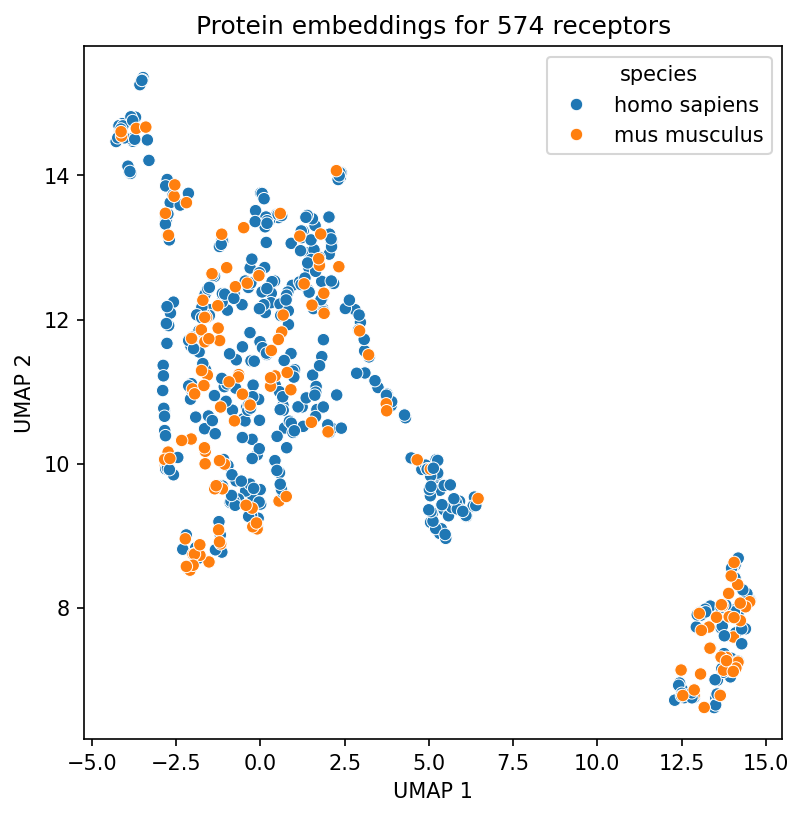

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=150)
sns.scatterplot(u, x=0, y=1, hue='species', ax=ax)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_title(f'Protein embeddings for {len(uniprot2seq)} receptors')

In [46]:
text_enc = TextEncoder(config_path='microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext', out_dim=256)
text_enc.model = text_enc.model.to(device)
text_enc.out = text_enc.out.to(device)

# freeze weights
for param in text_enc.model.parameters():
    param.requires_grad = False

/home/rico/miniconda3/envs/biomlhack/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [49]:
text_emb = text_enc.get_repr(sm2lang['descriptors'], batch_size=16, verbose=True).numpy(force=True)

Computing text embeddings: 100%|██████████| 312/312 [00:02<00:00, 135.27it/s]


In [52]:
u = umap.UMAP(n_neighbors=10).fit_transform(text_emb)
u = pd.DataFrame(u)
u['descriptors'] = sm2lang['descriptors']

<Axes: xlabel='0', ylabel='1'>

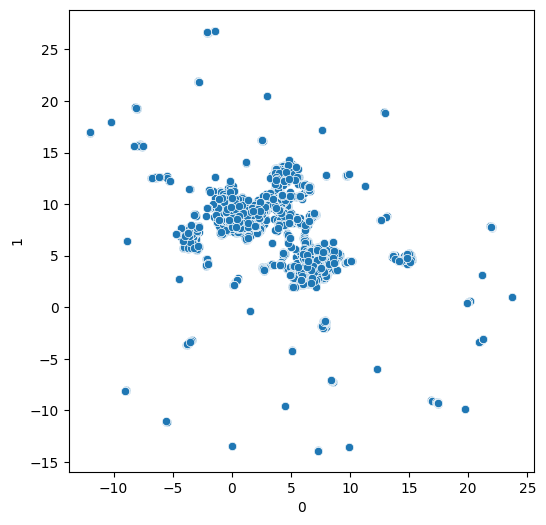

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
sns.scatterplot(u, x=0, y=1, ax=ax)

In [59]:
sm_enc = SmallMoleculeEncoder(config_path="ibm/MoLFormer-XL-both-10pct", out_dim=256)
sm_enc.model = sm_enc.model.to(device)
sm_enc.out = sm_enc.out.to(device)

# freeze weights
for param in sm_enc.model.parameters():
    param.requires_grad = False

In [61]:
sm_emb = sm_enc.get_repr(list(sm2receptor['SMILES'].unique()), batch_size=16, verbose=True).numpy(force=True)

Computing SM embeddings: 100%|██████████| 48/48 [00:00<00:00, 88.60it/s]


In [62]:
u = umap.UMAP(n_neighbors=10).fit_transform(sm_emb)
u = pd.DataFrame(u)

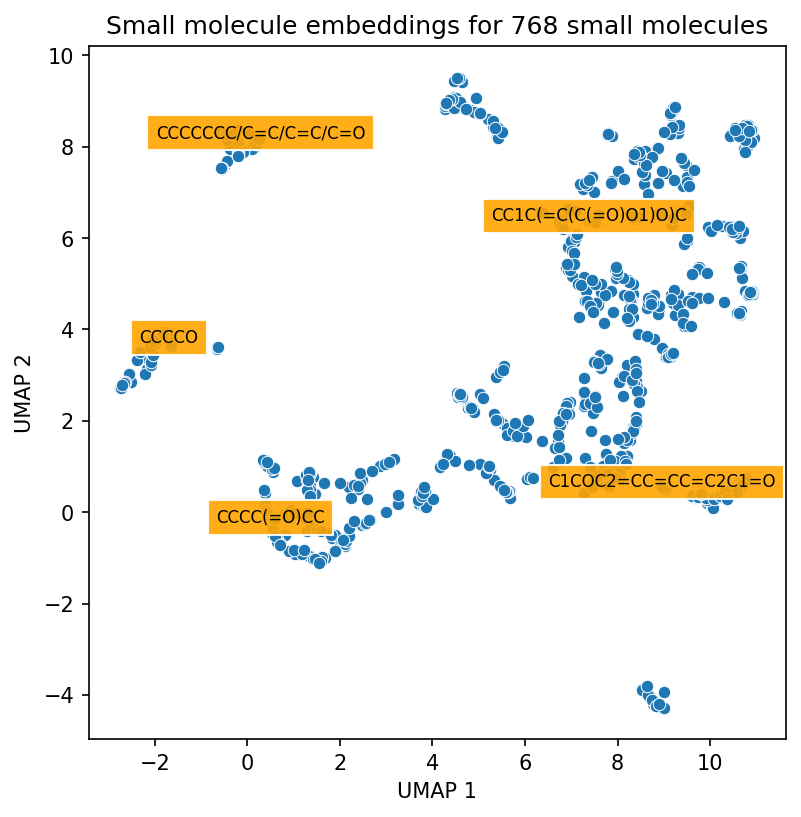

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=150)
sns.scatterplot(u, x=0, y=1, ax=ax)
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_title(f'Small molecule embeddings for {len(sm2receptor["SMILES"].unique())} small molecules')
for i in [3, 10, 50, 500, 190]:
    ax.text(u[0][i], u[1][i], sm2receptor['SMILES'].unique()[i], fontsize=8, ha='center', color='black', bbox=dict(facecolor='orange', alpha=0.9, edgecolor='white'))

